In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

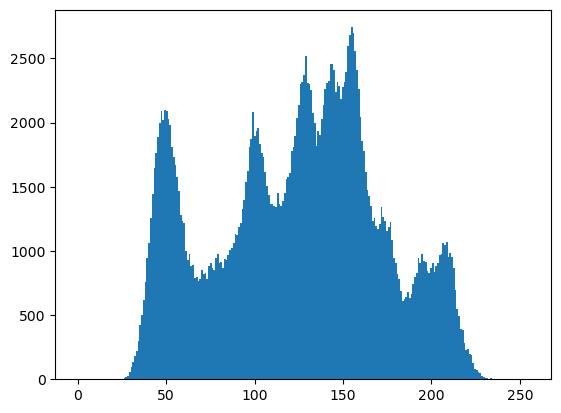

In [2]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("Original.png",img)
count = [0] * 256
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        count[img[i,j]] = count[img[i,j]] + 1
plt.hist([i for i in range(0,256)],weights=count,bins=256)
plt.savefig("histogram1")
plt.show()

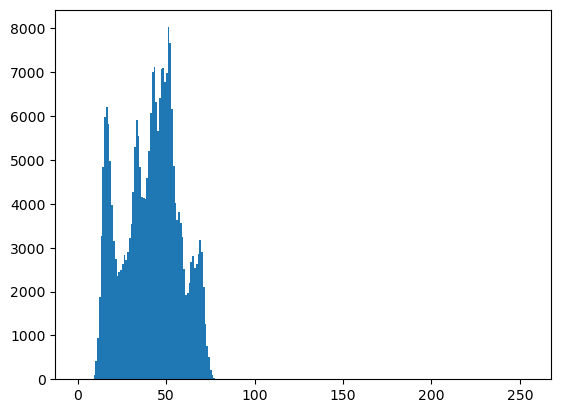

In [3]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
count = [0] * 256
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i,j] = img[i,j]//3
cv2.imwrite("IntensityBy3.png",img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        count[img[i,j]] = count[img[i,j]] + 1

plt.hist([i for i in range(0,256)],weights=count,bins=256)
plt.savefig("histogram2")
plt.show()



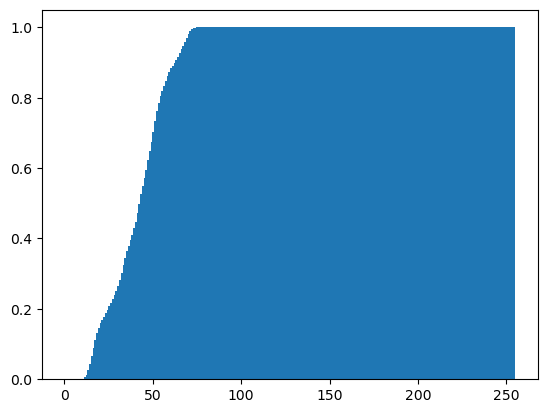

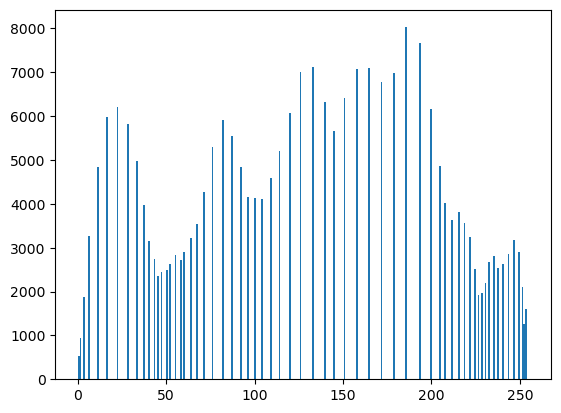

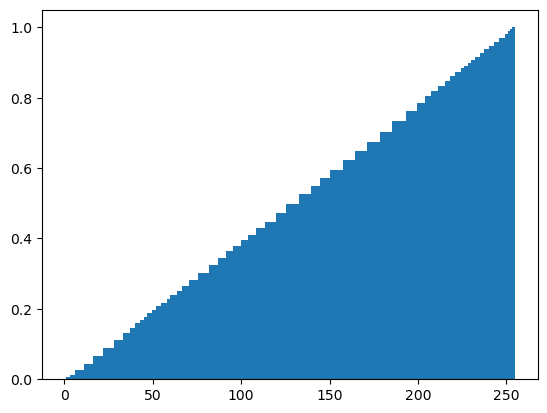

In [4]:
original_cdf = np.cumsum(count).astype(np.float32)
for i in range(len(original_cdf)):
    original_cdf[i] = original_cdf[i]/original_cdf[-1]
plt.hist([i for i in range(0,256)],weights=original_cdf,bins=256)
plt.show()
new_count = [0] * 256
new_img = np.zeros(shape = img.shape,dtype=np.int32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
            new_img[i,j] = original_cdf[img[i,j]] * 255
            new_count[new_img[i,j]] = new_count[new_img[i,j]] + 1
cv2.imwrite("Equalize.png",new_img)
plt.hist([i for i in range(0,256)],weights=new_count,bins=256)
plt.savefig("histogram3")
plt.show()
equal_cdf = np.cumsum(new_count).astype(np.float32)
for i in range(len(equal_cdf)):
    equal_cdf[i] = equal_cdf[i]/equal_cdf[-1]
plt.hist([i for i in range(0,256)],weights=equal_cdf,bins=256)
plt.show()